## Fraud Detection and Risk Analytics for FinTechs/SMEs

## Exploratory Data Analysis

### Data Collection

The dataset used in this project was sourced from Kaggle and is titled "Credit Card Fraud Detection". It contains credit card transactions made by European cardholders in September 2013 over a period of two days.

Key details of the dataset include:

- Number of transactions: 284,807

- Number of fraudulent transactions: 492 (about 0.172% of all transactions)

- Number of features: 31

- Feature details:

    - The features V1 to V28 are numerical values derived from a Principal Component Analysis (PCA) transformation applied to protect sensitive information.

    - The 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset.

    - The 'Amount' feature indicates the transaction amount.

    - The 'Class' feature is the target variable, with 1 indicating a fraudulent transaction and 0 indicating a genuine one.

    - The dataset is highly unbalanced with very few fraud cases compared to the total transactions. This characteristic makes it suitable for evaluating fraud detection methods that handle class imbalance effectively.

Overall, this dataset provides a realistic and challenging foundation for developing and testing machine learning models aimed at identifying fraudulent credit card transactions.

In [4]:
import kagglehub
import shutil
import os

# Download the latest version of the dataset (downloads to default cache)
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Dataset downloaded to:", path)

# Define your target folder
target_folder = "Data"

# Make sure the target folder exists
os.makedirs(target_folder, exist_ok=True)

# Move or copy the downloaded dataset files to your target folder
# Note: "path" points to the cache directory with downloaded files

shutil.move(path, target_folder)

print("Dataset moved to:", target_folder)


100%|██████████| 66.0M/66.0M [00:05<00:00, 12.9MB/s]

Extracting files...


Dataset downloaded to: /home/anupam9k/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
Dataset moved to: ML_research_notebooks/Data


### Before beginning the EDA, let us load the libararies necessary

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Moving forward, let us load the dataset

In [6]:
df = pd.read_csv("Data/creditcard.csv")

### Let us have a quick look at the dataset by pulling the first 5 rows

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Let us look at the column information at a glance

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for missing values is paramount to understanding the dataset and building robust models.

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As can be seen, the dataset does not have any missing values.

### Let us look at the class distribution in "Class" column

In [10]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


### Let us perform Data Visualization and Class Imbalance Check

#### 1. Class Distribution

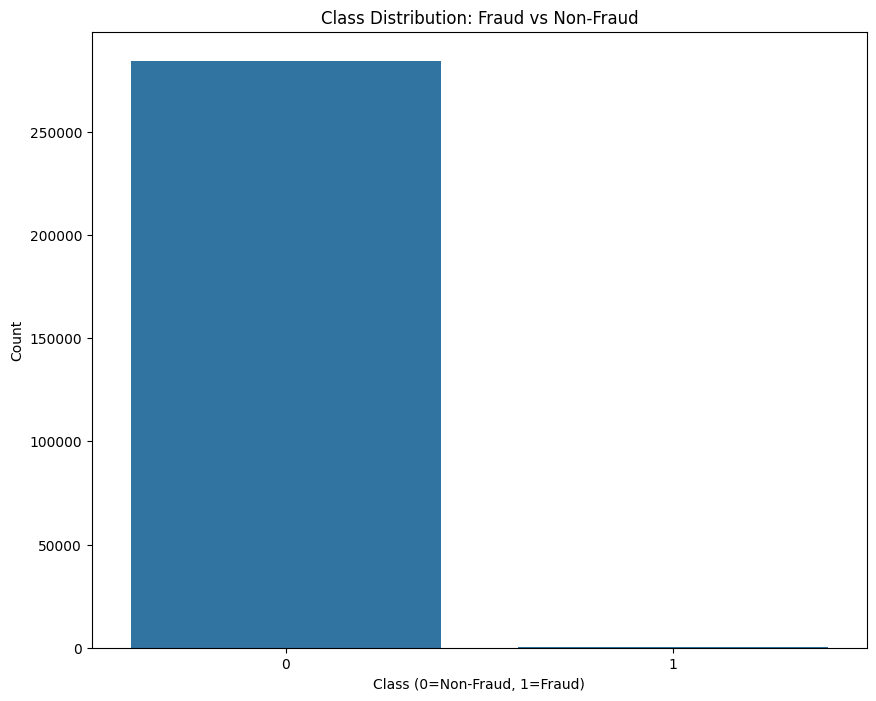

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Count')
plt.show()

As expected, non-fraud transactions (class 0) massively outnumber fraud (class 1).

The distribution plot shows a highly imbalanced dataset, where legitimate transactions (Class 0) overwhelmingly outnumber fraudulent transactions (Class 1). Specifically, fraudulent cases represent only about 0.17% of all transactions. This extreme imbalance poses a significant challenge for modeling, as naive models could simply predict every transaction as non-fraud and still achieve high accuracy. 

#### 2. Transaction Amount Distribution by Class (log scale)

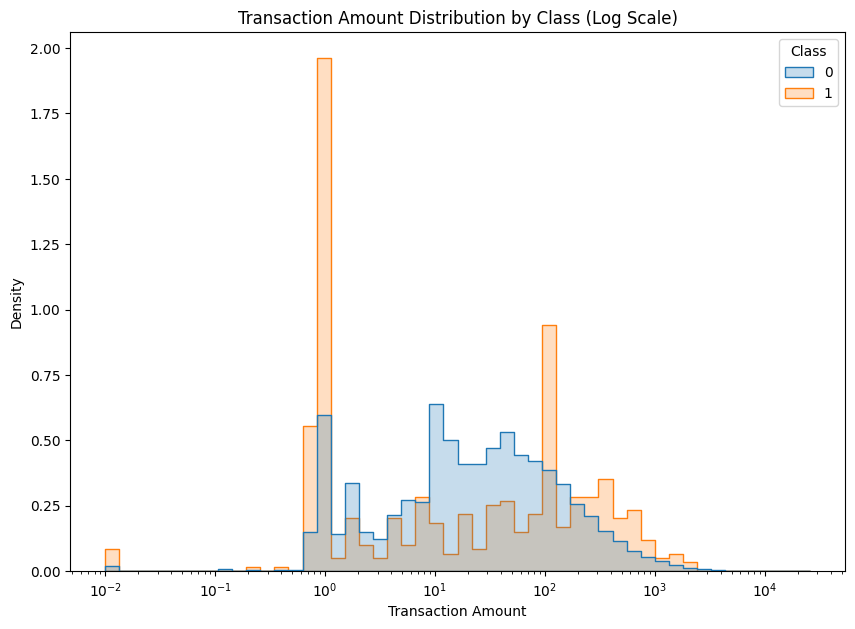

In [15]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = "Amount", hue = "Class", bins = 50, log_scale=True, element = 'step', stat = "density", common_norm= False)
plt.title('Transaction Amount Distribution by Class (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

The histogram reveals distinct patterns in the transaction amounts between fraudulent and non-fraudulent transactions when visualized on a logarithmic scale. Fraudulent transactions tend to cluster in certain amount ranges, which may suggest typical fraud amounts—for example, either very low-value transactions aimed at testing stolen credentials or higher-value transactions attempting to extract significant sums. This insight justifies including the amount as a key feature and motivates further investigation into amount thresholds or segmentation strategies for enhanced fraud prediction.

#### 3. Transaction Time Distribution by Class

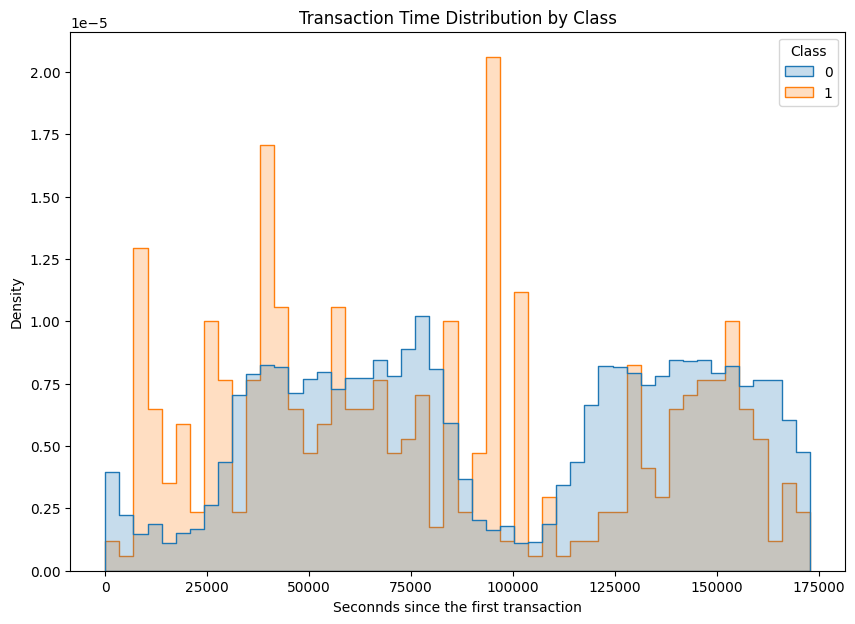

In [17]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = "Time", hue = "Class", bins = 50, element= 'step', stat = 'density', common_norm= False)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Seconnds since the first transaction')
plt.ylabel('Density')
plt.show()

The transaction time distribution shows how transaction activity varies over the seconds elapsed since the first transaction in the dataset. If the distributions of fraudulent and non-fraudulent transactions appear roughly uniform or similar, time may not be a strong standalone predictor. However, any noticeable spikes or irregularities in the fraud transaction timeline could indicate concentrated fraud attacks during specific periods. This observation suggests engineering time-based features (such as hour of day, day of week) to capture temporal fraud trends and improve the model’s sensitivity to time-related anomalies.

### General Interpretation Summary

The EDA confirms the classic challenges of fraud detection: extreme class imbalance and nuanced feature distributions. The available features, including anonymized PCA components, transaction amount, and time, provide a solid base for applying machine learning techniques. Effective preprocessing—scaling amounts, addressing imbalance—and thorough feature engineering will be key to building a robust fraud detection model. Attention to explainability and interpretability will be essential for real-world deployment, as fraud analysts must understand the rationale behind flagged transactions.

### Understand the Time Column

- The Time feature represents the seconds elapsed since the first transaction in the dataset.

- Our goal is to convert this raw time into meaningful calendar-related features such as:

    - Hour of day (0–23)

    - Day of week (0–6, e.g., Monday to Sunday)

    - Elapsed days

    - Other cyclic features like sin/cos transforms of hour or day can capture periodicity.

### Converting Time to DateTime Features

In [37]:
import pandas as pd

# Let us add a reference start "datetime" (arbitrary since no absolute date): use "2020-01-01"
start_date = pd.to_datetime('2020-01-01')

# Create a datetime column by adding seconds
df['TransactionDate'] = start_date + pd.to_timedelta(df['Time'], unit='s')

# Extract hour of day
df['Hour'] = df['TransactionDate'].dt.hour

# Extract elapsed days
df['ElapsedDays'] = (df['TransactionDate'] - start_date).dt.days

# Create cyclic features for hoyr and day of week (helps many ML Algorithms)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

### Now, it is time to analyze and visualize new features

#### Average Fraud rate by hour

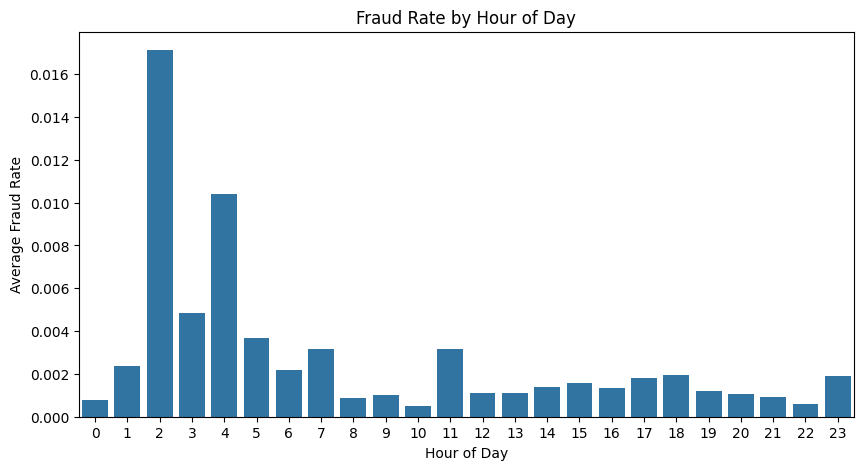

In [38]:
fraud_by_hour = df.groupby('Hour')['Class'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x = fraud_by_hour.index, y = fraud_by_hour.values)
plt.title("Fraud Rate by Hour of Day")
plt.xlabel('Hour of Day')
plt.ylabel('Average Fraud Rate')
plt.show()

### Key Insights
1. Strong Temporal Variation in Fraud Rate

    - The average fraud rate is highest in the early morning hours, peaking sharply at hour 2 (i.e., 2 AM), with secondary smaller spikes in the subsequent hours.

    - After about 6 AM, the rate drops and stays much lower and relatively flat for the rest of the day.

    - There’s another slight rise at the end of the day (around hour 23).

2. Possible Reasons

    - Less Vigilance: Fraudsters may intentionally operate during off-peak hours (late night/early morning) when fewer real customers and anti-fraud staff are active, hoping fraud goes unchecked.

    - Shift Change-overs: Internal bank monitoring might be weakest around these hours.

    - Automated Systems: Some fraud attacks are automated scripts running in the dead of night.



The visualization of fraud rates by hour of day reveals a significant temporal pattern in fraudulent activity. Fraudulent transactions peak sharply during the early morning hours, especially between 1 AM and 3 AM, where the fraud rate is substantially higher—up to five times—compared to other periods of the day. Following this peak, the fraud rate declines steeply and remains relatively low throughout typical business hours, with only minor fluctuations late at night.

This pattern strongly suggests that fraudsters tend to operate during nighttime hours, likely taking advantage of reduced transaction volumes and lower levels of real-time monitoring or human oversight. From a modeling perspective, this analysis validates the importance of including the hour of transaction as a key feature—ideally encoded cyclically to capture its periodic nature—in machine learning models for fraud detection.

For practical applications, such insights can guide fraud detection teams and compliance officers to dynamically adjust their monitoring efforts, such as increasing vigilance or lowering alert thresholds during these high-risk hours. It also highlights how integrating temporal analytics into fraud detection systems offers business value by optimizing resource allocation and response strategies.

### Save the Preprocessed Dataset

In [47]:
os.makedirs("Cleaned_Data", exist_ok=True)
df.to_csv("Cleaned_Data/creditcard_cleaned.csv", index=False)